<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [9]:
import seaborn as sns

data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


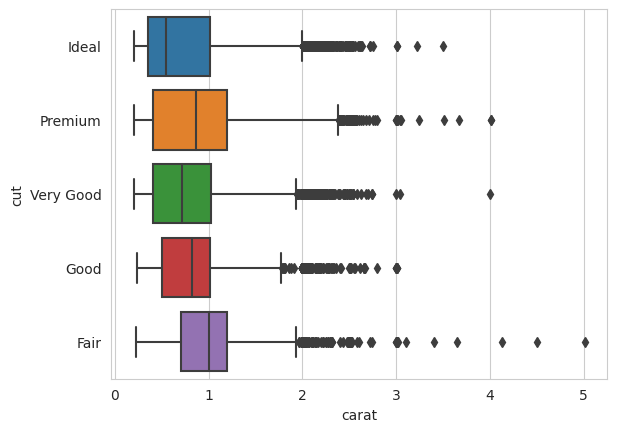

In [17]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=data["carat"], y=data["cut"])
  

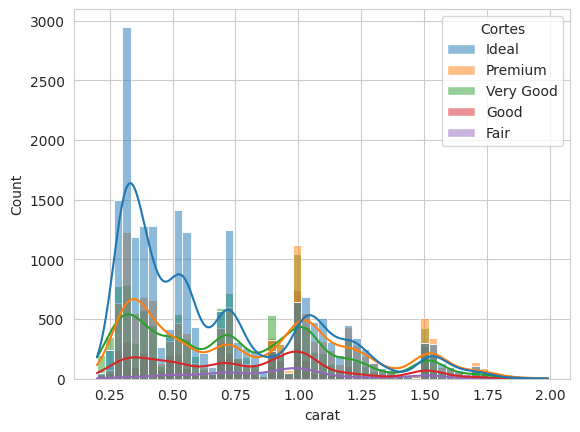

In [12]:
datax = data.query('0 <= carat <2')

with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=datax, x="carat", hue="cut", kde=True)

  grafico.get_legend().set_title("Cortes");

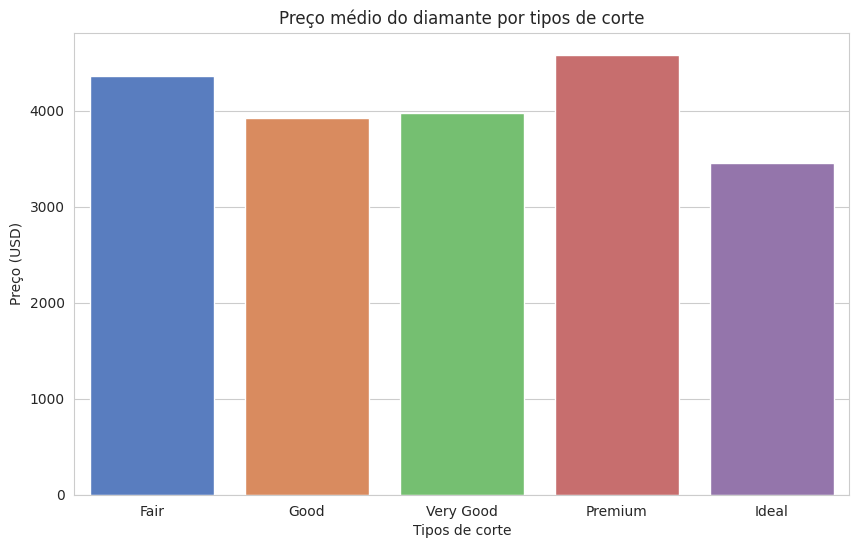

In [2]:
# gráfico do exercício 1
with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data=data, x='cut', y='price', palette='muted', ci=None, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
    grafico.set(title='Preço médio do diamante por tipos de corte', xlabel='Tipos de corte', ylabel='Preço (USD)')
    grafico.figure.set_size_inches(10,6)


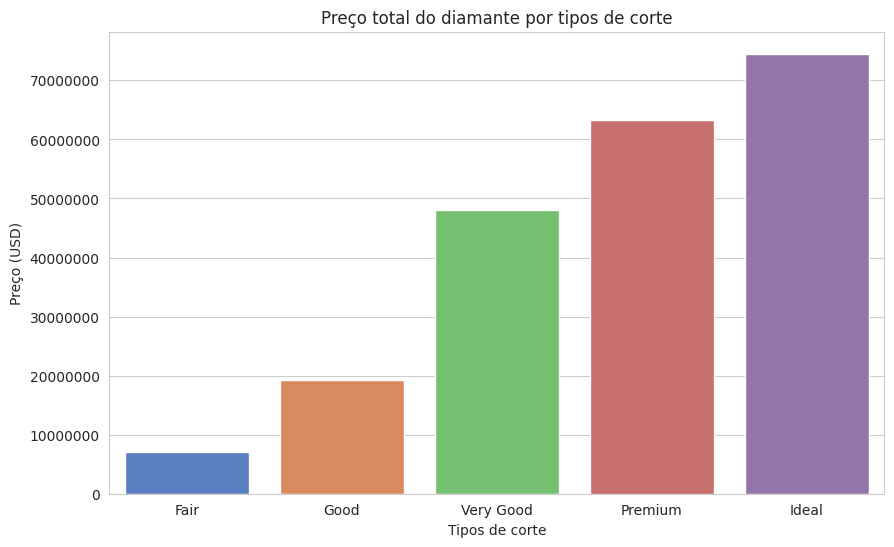

In [3]:
soma = data[['cut', 'price']].groupby('cut').agg('sum').reset_index().sort_values('price')

with sns.axes_style('whitegrid'):
    graficot = sns.barplot(data=soma, x='cut', y='price', palette='muted', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
    graficot.set(title='Preço total do diamante por tipos de corte', xlabel='Tipos de corte', ylabel='Preço (USD)')
    graficot.ticklabel_format(axis='y', style='plain')
    graficot.tick_params(axis='both', labelsize=10)
    graficot.figure.set_size_inches(10,6)

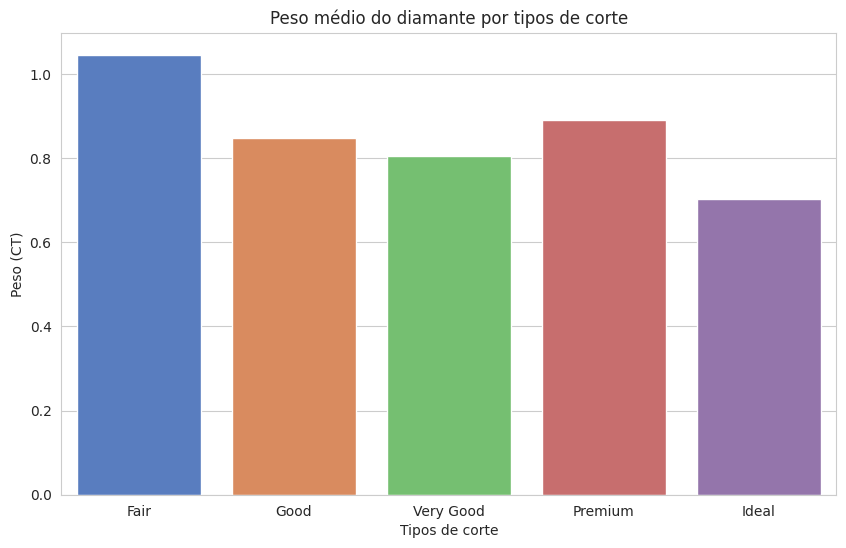

In [4]:
with sns.axes_style('whitegrid'):
    grafico2 = sns.barplot(data=data, x='cut', y='carat', palette='muted', ci=None, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
    grafico2.set(title='Peso médio do diamante por tipos de corte', xlabel='Tipos de corte', ylabel='Peso (CT)')
    grafico2.figure.set_size_inches(10,6)

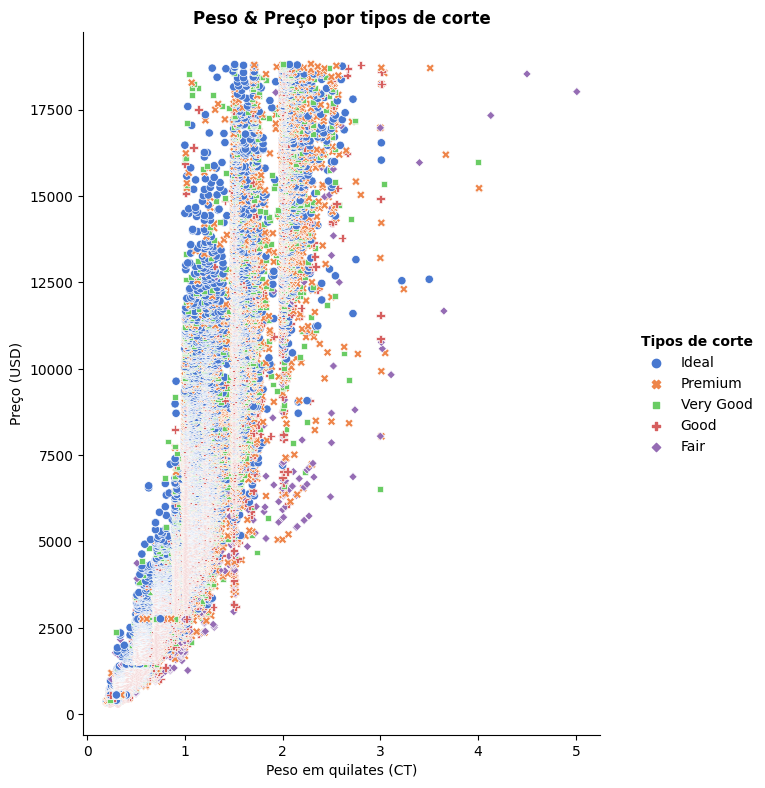

In [5]:
grafico_unit = sns.relplot(data=data, x='carat', y='price', hue='cut', style='cut', palette='muted')
grafico_unit.ax.set_title('Peso & Preço por tipos de corte', fontsize=12, fontweight='bold')
grafico_unit.set_xlabels("Peso em quilates (CT)", fontsize=10)
grafico_unit.set_ylabels('Preço (USD)', fontsize=10)
grafico_unit.legend.set_title('Tipos de corte', prop={'size': 10, 'weight': 'bold'})
grafico_unit.fig.set_size_inches(w=20 / 2.54, h=20 / 2.54)

**Insight do gráfico 1**: Podemos chegar na conclusão que quanto maior a qualidade do corte, o diamante tende a ter menos peso e mais valor. 
Já os com qualidade inferior valem menos, porém conseguem manter uma média até mais alta de preço no geral porque possuem mais peso.

---

## 2\. Número de passageiros em dezembro por ano

In [6]:
import seaborn as sns

data = sns.load_dataset('flights')
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


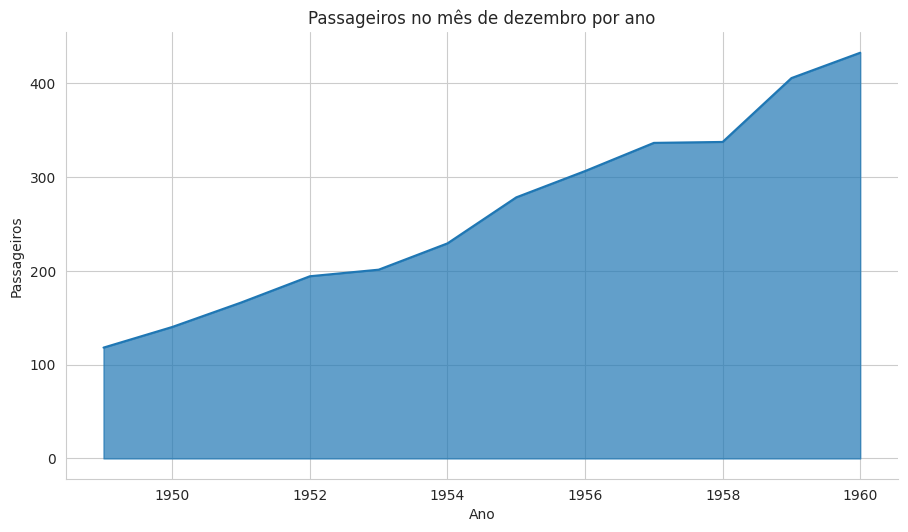

In [7]:
# gráfico do exercício 2
import matplotlib.pyplot as plt

flights = data.query('month == "Dec"')[['year','month','passengers']]

with sns.axes_style('whitegrid'):
    grafico = sns.FacetGrid(data=flights, palette="pastel")
    grafico.map(sns.lineplot, 'year', 'passengers')
    grafico.map(plt.fill_between, 'year', 'passengers', alpha=0.7)
    grafico.set(title='Passageiros no mês de dezembro por ano',xlabel='Ano', ylabel='Passageiros')
    grafico.fig.set_size_inches(w=30/2.54, h=15/2.54)

**Insight do gráfico 2**: Durante os anos houve uma crescente no numero de passageiros.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [8]:
import seaborn as sns

data = sns.load_dataset('flights')
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


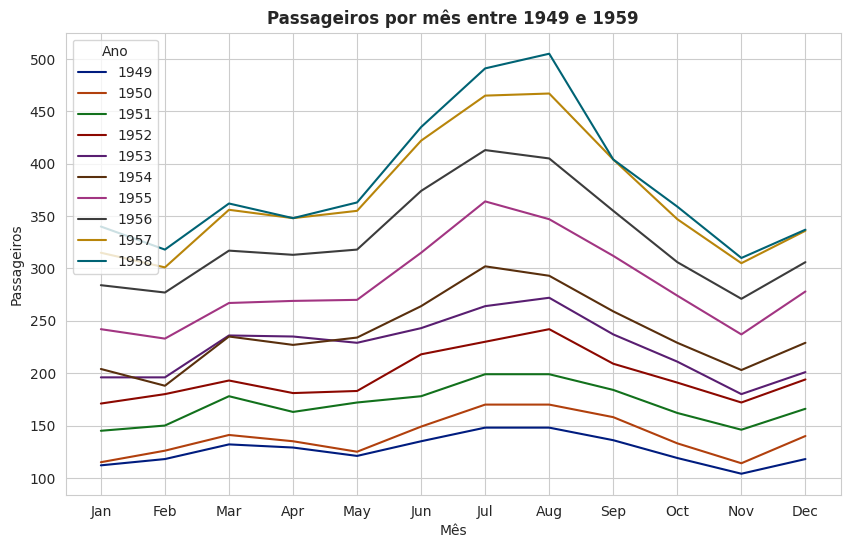

In [9]:
# gráfico do exercício 3

flights = data.query('1949 <= year < 1959')

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=flights, x='month', y='passengers', hue='year', palette='dark')
  grafico.set_title('Passageiros por mês entre 1949 e 1959', fontweight='bold')
  grafico.set(xlabel='Mês', ylabel='Passageiros')
  grafico.get_legend().set_title('Ano')
  grafico.figure.set_size_inches(10,6)

**Insight do gráfico 3**: O numero de passageiros mantem um padrão de aumento durante os anos, exceto no ano de 1953 que foi inferior ao ano anterior.Durante o meio e fim de ano é onde há grande diferença com uma crescente considerável.

---